In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sb

In [2]:
dataset = pd.read_csv('churn_preprocess_data.csv')

In [3]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,5,27.43,137.15,0001-XXXX,Male,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,Yes
1,0,42,38.28,1607.76,0002-XXXX,Female,No,No,Yes,No phone service,...,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,Yes
2,0,61,106.44,6492.84,0003-XXXX,Male,No,No,Yes,No phone service,...,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,Yes
3,1,22,92.49,2034.78,0004-XXXX,Male,No,Yes,Yes,No,...,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,No
4,1,21,19.63,412.23,0005-XXXX,Male,Yes,Yes,No,No,...,No,No,No internet service,No,No,No internet service,One year,No,Bank transfer,Yes


In [4]:
dataset.isnull().sum()

SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [5]:
# Number of rows and Columns 
print("The Number of Row:",dataset.shape[0])
print("The Number of Column",dataset.shape[1])

The Number of Row: 300
The Number of Column 21


# Exploratory Data Analysis 

C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

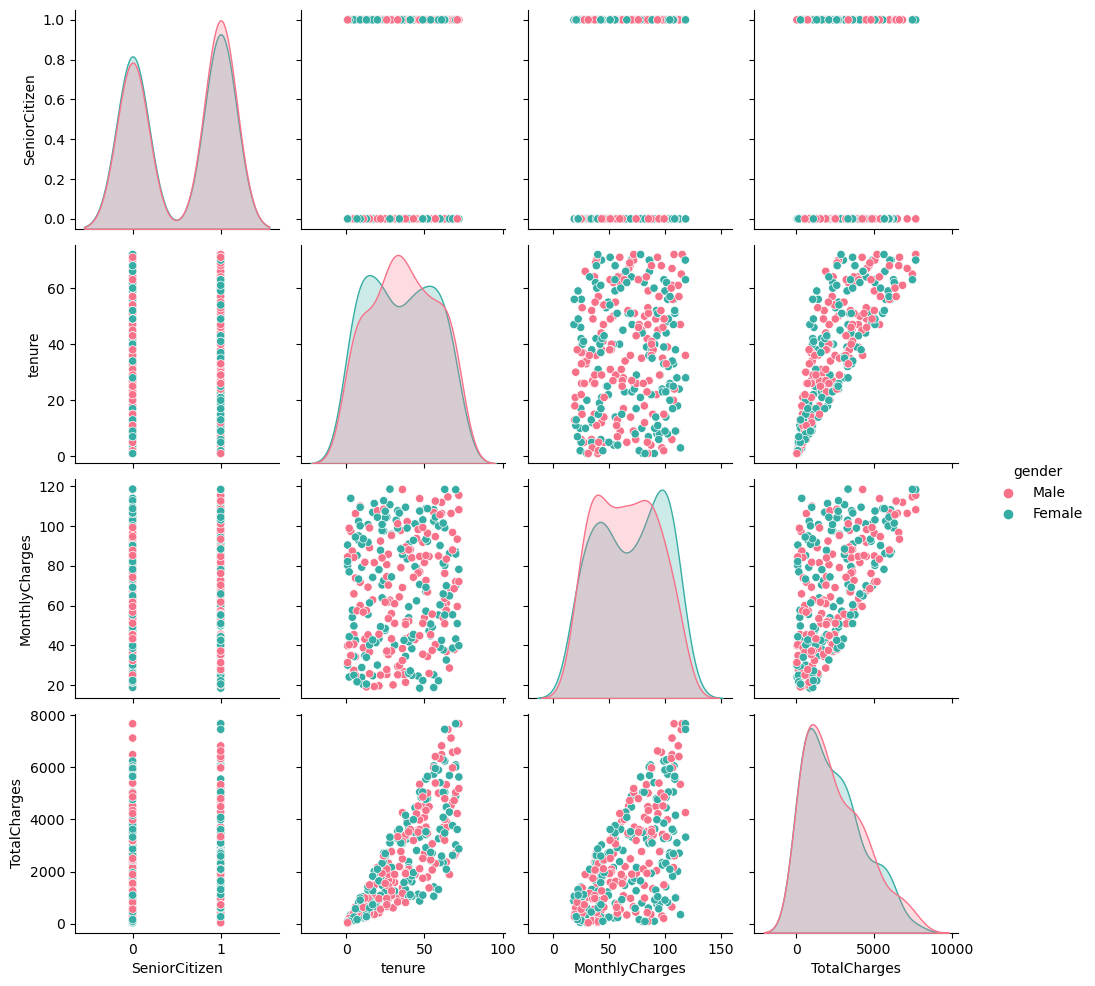

In [6]:
# Best for numerical input variables
# Categorical column → hue la use pannalam
# Output column (Churn) hue la best

# Understand relationships between numerical variables

sb.pairplot(dataset,hue = 'gender',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [7]:
# To Check Balance or Imbalance Dataset
dataset["gender"].value_counts()

gender
Male      151
Female    149
Name: count, dtype: int64

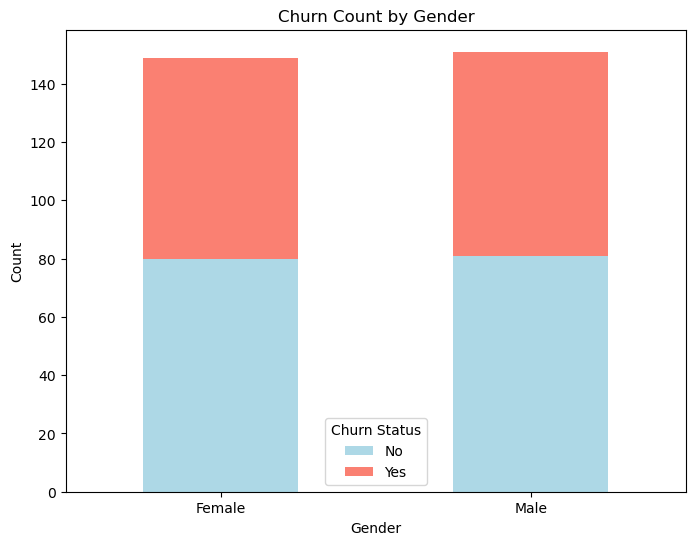

In [8]:
churn_gender_counts = dataset.groupby(["gender", "Churn"]).size().unstack()

# Plot the bar chart
churn_gender_counts.plot(kind="bar", stacked=True, figsize=(8, 6), color=["lightblue", "salmon"])

# Labels & Title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn Count by Gender")
plt.legend(title="Churn Status")
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [9]:
# Count customers by Contract & Gender
contract_gender_counts = dataset.groupby(["Contract", "gender"]).size().unstack()

# Display the result
print(contract_gender_counts)
# Ithu run panna contract wise Male & Female count theeriyum.

gender          Female  Male
Contract                    
Month-to-month      55    56
One year            51    46
Two year            43    49


In [10]:
# Count customers by Contract & Gender
contract_gender_counts = dataset.groupby(["PaymentMethod", "gender"]).size().unstack()

# Display the result
print(contract_gender_counts)
# Ithu run panna contract wise Male & Female count theeriyum.

gender            Female  Male
PaymentMethod                 
Bank transfer         27    49
Credit card           40    34
Electronic check      41    36
Mailed check          41    32


In [11]:
# Create tenure bins (0-12, 13-24, ..., 61+ months)
bins = [0, 12, 24, 36, 48, 60, dataset["tenure"].max()]
labels = ["0-12", "13-24", "25-36", "37-48", "49-60", "61+"]

# Create new tenure category column
dataset["TenureGroup"] = pd.cut(dataset["tenure"], bins=bins, labels=labels, right=True)

# Count churn status for each gender & tenure group
churn_tenure_gender = dataset.groupby(["gender", "TenureGroup", "Churn"]).size().unstack()

# Display result
print(churn_tenure_gender)


Churn               No  Yes
gender TenureGroup         
Female 0-12         14   16
       13-24        12   15
       25-36        10    8
       37-48        16    9
       49-60        14   12
       61+          14    9
Male   0-12         12   13
       13-24         7   11
       25-36        21   14
       37-48        16    7
       49-60        12   10
       61+          13   15


C:\Users\anandha rishi\AppData\Local\Temp\ipykernel_8948\4174455113.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tenure_gender = dataset.groupby(["gender", "TenureGroup", "Churn"]).size().unstack()


C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anandha rishi\anaconda3\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


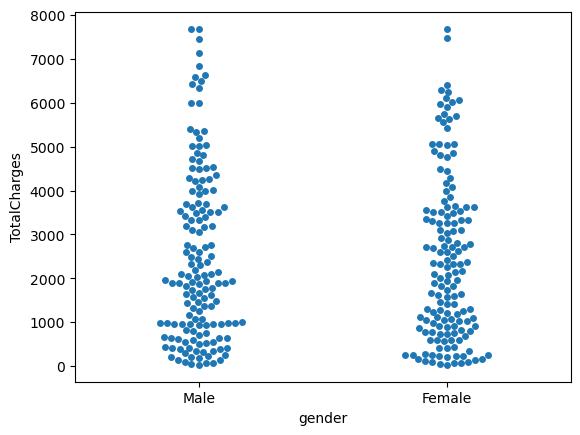

In [12]:
# Same as strip plot but avoids overlap
# Best for visualizing numerical vs categorical data
# Distributes points better than strip plot

sb.swarmplot(x = "gender", y = "TotalCharges", data = dataset)
plt.show()